## Getting Support Figures

In this notebook, we'll just post the code used to obtain figures that will be relevant for the MSc Thesis that do not use, in any regard, the educational dataset.

In [1]:
#importar packages para manipulação dos diretórios
import os
import glob

#packages standard para tratamento de dados
import pandas as pd
import numpy as np
import scipy as sc

#visualização
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

#packages geográficos
import requests

sns.set()
%matplotlib inline

#### Uploading Files

In [2]:
#AVISO: NÃO MUDAR LOCALIZAÇÕES DOS SCRIPTS OU FICHEIROS

historico = pd.read_csv('../Data/EDM_LA_nbr of papers.csv', sep = ';')

#Resultados
resultados = pd.read_excel("../Data/Modeling Stage/Results/IMS/Model_Results.xlsx", 
                               sheet_name = None)

In [3]:
resultados

{'At risk students':    Moment of prediction                            Model  Accuracy  \
 0          10% Duration          Traditional Classifiers  0.802000   
 1          10% Duration                              KNN  0.786000   
 2          10% Duration                               LR  0.799000   
 3          10% Duration                               NB  0.542000   
 4          10% Duration                             CART  0.779000   
 5          10% Duration                              SVM  0.799000   
 6          10% Duration                             LSTM  0.792882   
 7          10% Duration  Traditional Classifiers - SMOTE  0.733000   
 8          10% Duration                     LSTM - SMOTE  0.587216   
 9          25% Duration          Traditional Classifiers  0.804000   
 10         25% Duration                              KNN  0.799000   
 11         25% Duration                               LR  0.799000   
 12         25% Duration                               NB

#### Figure 1: Evolution of Published Works in EDM and LA

In [4]:
# setting up for figure
# x_axis = historico['Year'] 
# LA = historico['Learning Analytics']
# EDM = historico['Educational Data Mining']

# fig = go.Figure()

# fig.add_trace(
#     go.Bar(
#         x= x_axis,
#         y= LA,
#         name='<b>Learning Analytics</b>',
#         marker_color='rgb(92, 102, 108)'
#         )
#     )

# fig.add_trace(
#     go.Bar(
#         x=x_axis,
#         y=EDM,
#         name='<b>Educational Data Mining</b>',
#         marker_color='rgb(191, 215, 47)'
#         )
#     )

# fig.update_layout(
#     font=dict(
#         family="Calibri, serif",
#         color = 'black'),
#     xaxis_tickfont_size=14,
#     xaxis_title = '<b>Year</b>',
#     yaxis=dict(
#         title='<b>Number of Research Papers</b>',
#         titlefont_size=16,
#         tickfont_size=14,
#     ),
#     legend=dict(
#         x=0,
#         y=1.0,
#         bgcolor='rgba(0, 0, 0, 0)',
#         bordercolor='rgba(255, 255, 255, 0)'
#     ),
#     barmode='group',
#     bargroupgap=0.1 # gap between bars of the same location coordinate.
# )

# fig.show()

# fig.write_image("../Images/figure_1.png", )            
# fig.show()

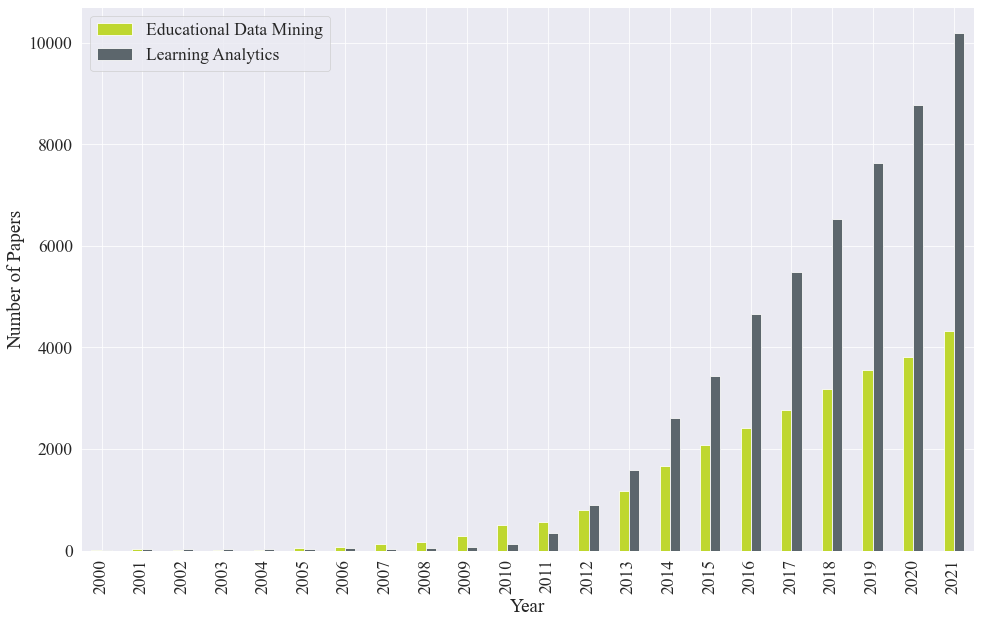

In [5]:
#set seaborn plotting aesthetics
#settub
sns.set_theme(context='paper', font='Times New Roman', rc={"figure.figsize":(16, 10)}, font_scale=2)

ax = historico.plot(kind = 'bar', x = 'Year', color=['#BFD72F', '#5C666C'], )

ax.set(ylabel = 'Number of Papers',
      xlabel = 'Year')

# adding text annotations
#plt.text(8, 500, "1st EDM\nConference", horizontalalignment='center', size='medium', color='#BFD72F', weight='bold')
#plt.text(11, 900, "1st LA\nConference", horizontalalignment='center', size='medium', color='#5C666C', weight='bold')
ax.legend(loc='upper left')

plt.savefig("../Images/figure_1_tnr.png", dpi=300)

The following cell results include results in our different performance metrics

In [6]:
#editing

resultados['At risk students']['State'] = 'Students at risk'
resultados['High performing students']['State'] = 'High performing students'

IMS_results = pd.concat([resultados['At risk students'], resultados['High performing students']])

In [7]:
IMS_results

,Moment of prediction,Model,Accuracy,Accuracy (sd),Precision,Precision (sd),Recall,Recall (sd),AUROC,AUROC (sd),Unnamed: 10,AUC,Recall.1,Accuracy.1,Precision.1,State
0,10% Duration,Traditional Classifiers,0.802000,0.023000,0.713000,0.208000,0.028000,0.013000,0.681000,0.023000,NaN,NaN,NaN,NaN,NaN,Students at risk
1,10% Duration,KNN,0.786000,0.029000,0.393000,0.095000,0.101000,0.070000,0.638000,0.029000,NaN,2.0,2.0,4.0,1.0,Students at risk
2,10% Duration,LR,0.799000,0.023000,0.235000,0.401000,0.002000,0.001000,0.664000,0.023000,NaN,1.0,5.0,1.0,5.0,Students at risk
3,10% Duration,NB,0.542000,0.024000,0.259000,0.026000,0.651000,0.128000,0.629000,0.024000,NaN,3.0,1.0,6.0,4.0,Students at risk
4,10% Duration,CART,0.779000,0.024000,0.327000,0.072000,0.093000,0.026000,0.622000,0.024000,NaN,4.0,3.0,5.0,2.0,Students at risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,50% Duration,LSTM - SMOTE,0.504932,0.025241,0.306155,0.013333,0.620828,0.047397,0.556631,0.021250,NaN,NaN,NaN,NaN,NaN,High performing students
16,100% Duration,Traditional Classifiers,0.782000,0.017000,0.668000,0.034000,0.423000,0.029000,0.796000,0.017000,NaN,NaN,NaN,NaN,NaN,High performing students
17,100% Duration,LSTM,0.708320,0.011941,0.400928,0.101595,0.116629,0.049173,0.589280,0.022377,NaN,NaN,NaN,NaN,NaN,High performing students
18,100% Duration,Traditional Classifiers - SMOTE,0.763000,0.017000,0.575000,0.029000,0.560000,0.034000,0.781000,0.017000,NaN,NaN,NaN,NaN,NaN,High performing students


In [8]:
test = IMS_results.melt(id_vars = ['Moment of prediction', 'Model', 'State'], value_vars=['Accuracy', 'Precision', 
                                                                                                   'Recall', 'AUROC'],
                                                                                           var_name = 'Performance Metric',
                                                                                           value_name = 'Value')

test = test[(test['Moment of prediction'] != '100% Duration') & (test['Model'].isin(['Traditional Classifiers',
                                                                                    'Traditional Classifiers - SMOTE',
                                                                                    'LSTM',
                                                                                    'LSTM - SMOTE']))]

In [9]:
colors = ["#bfd72f", "#5C666C", "#335000", '#000c12']

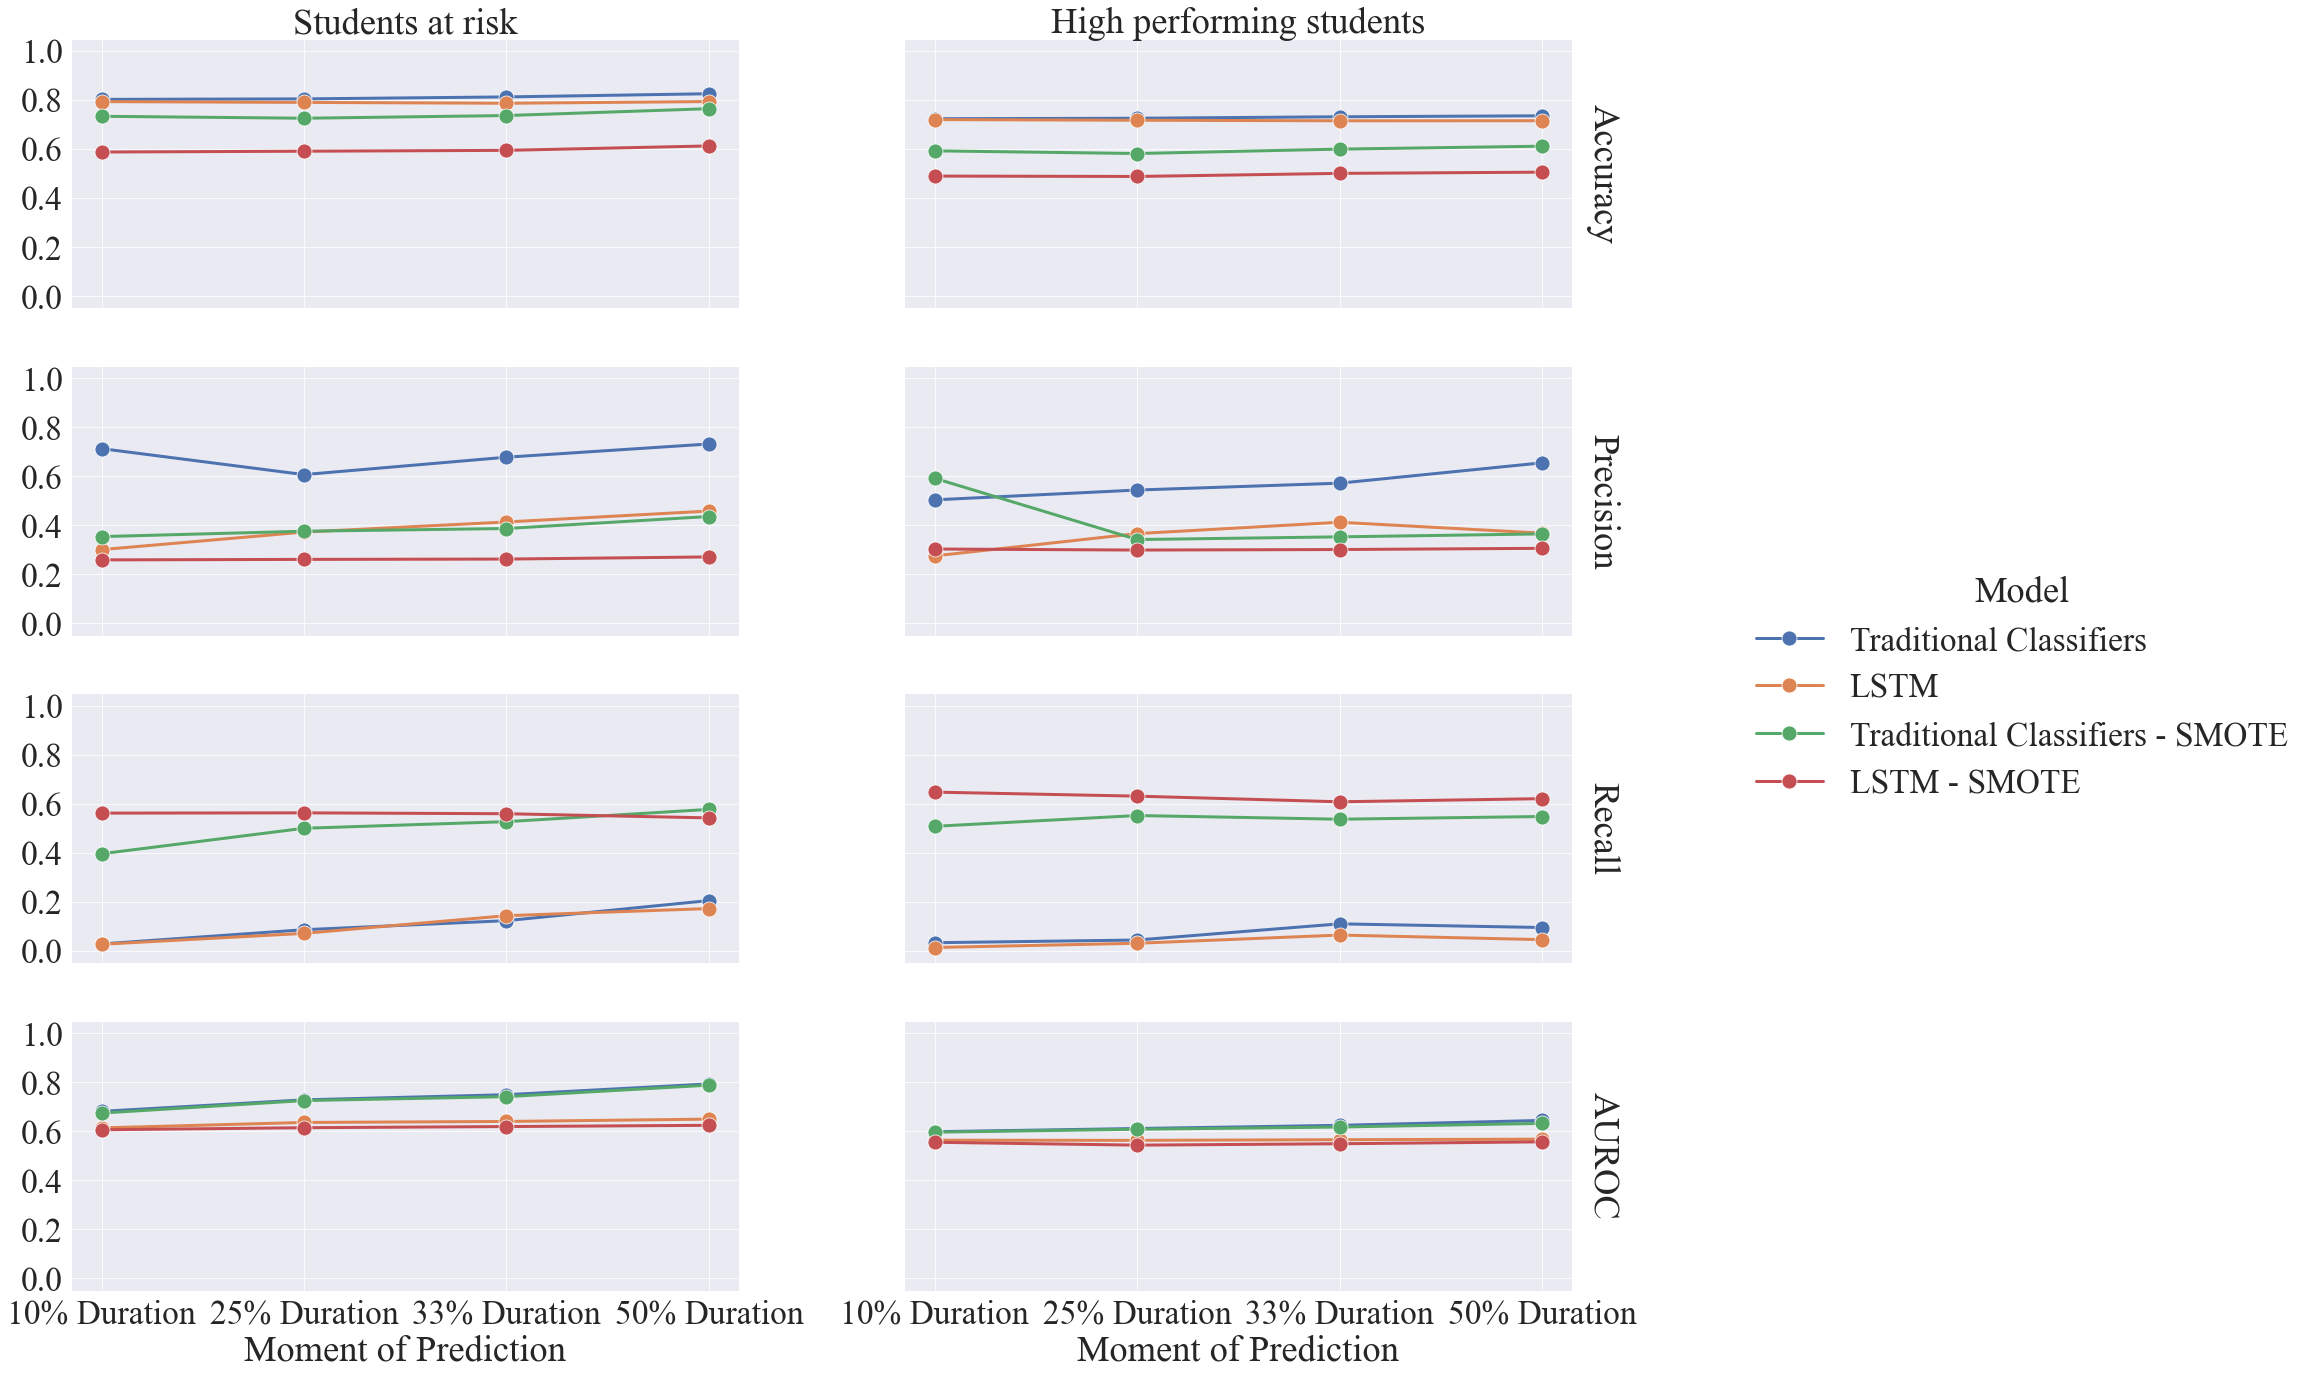

In [10]:
#set seaborn plotting aesthetics
sns.set_theme(context='paper', font='Times New Roman', rc={"figure.figsize":(24, 16)}, font_scale=3.8)


g = sns.FacetGrid(test, col= 'State', row = 'Performance Metric', hue="Model", 
                margin_titles=True, height=5, 
                 aspect= 2.5, ylim = (-0.05,1.05), despine = False, legend_out=True)
                  
g.map(sns.lineplot, 'Moment of prediction', 'Value', linewidth = 3,
     marker = 'o', markersize=15).add_legend()                  
g.set_axis_labels("Moment of Prediction", '')
g.set_titles(col_template="{col_name}", row_template="{row_name}")

g.set(yticks=[0, 0.2, 0.4, 0.6, 0.8, 1])
g.tight_layout()

#plt.savefig("../Images/Model_Performances_IMS_paper.png", dpi=300)

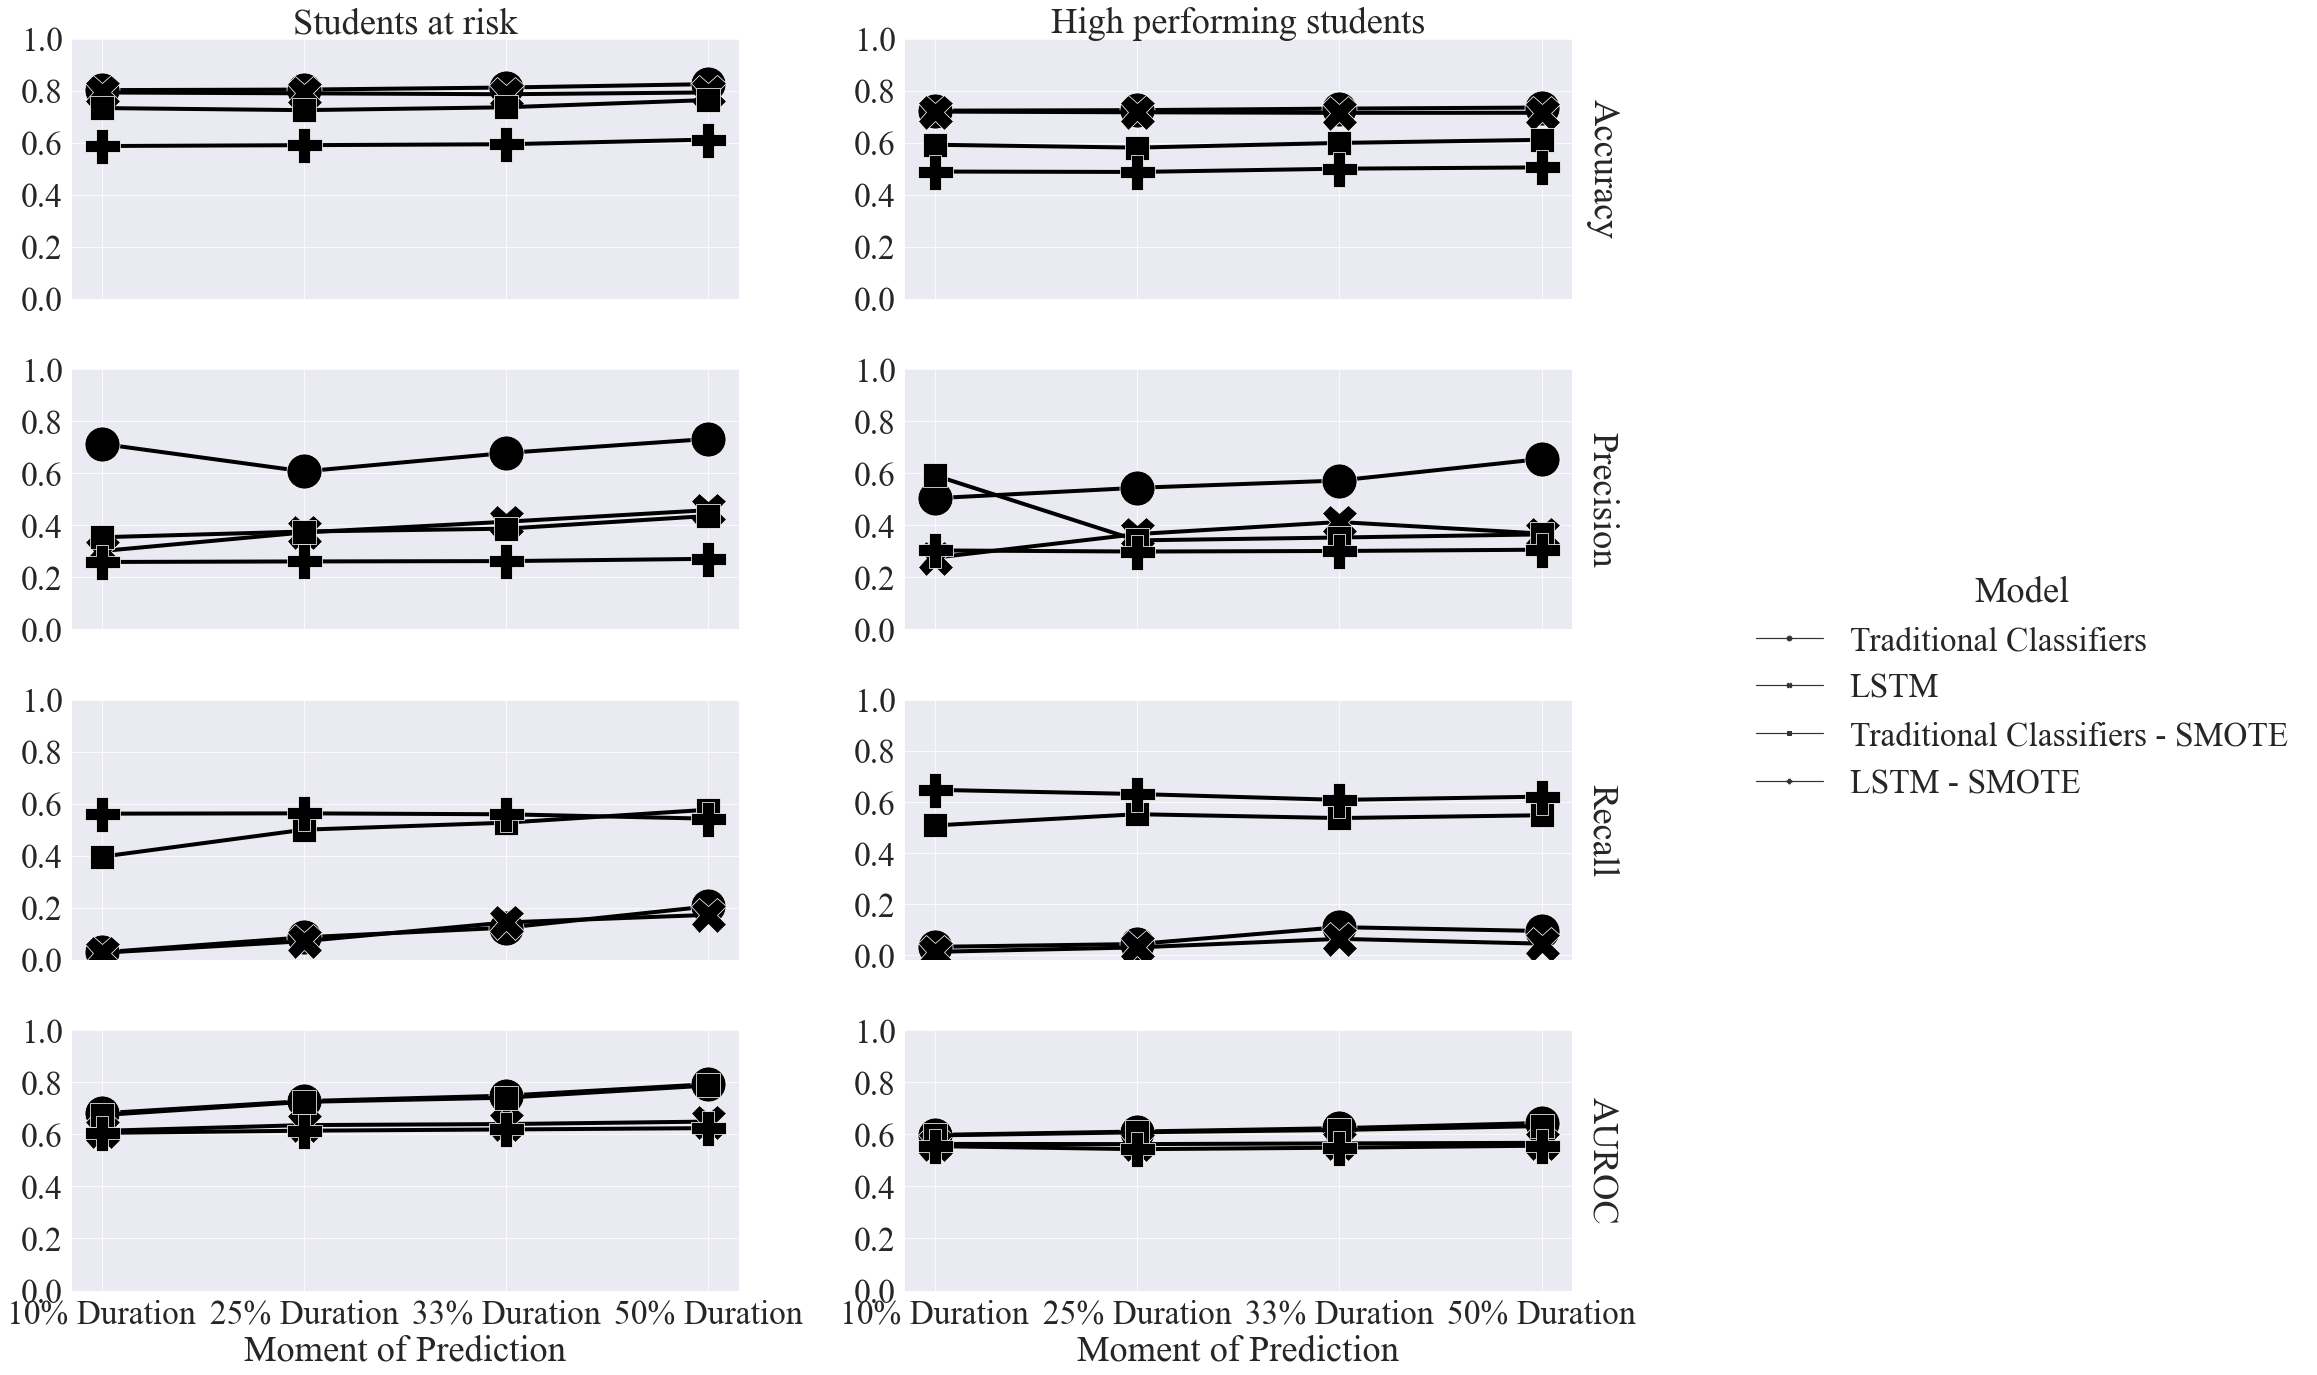

In [12]:
g = sns.relplot(x = 'Moment of prediction', y = 'Value', data=test,
               col='State', row='Performance Metric',
                kind="line", style="Model",
                markers=True, dashes=False,
                markersize=35, linewidth = 4,
               height=5, aspect= 2.5,
                facet_kws={"margin_titles": True,
                           'sharey' : False},
               color = 'black',)

g.set_axis_labels("Moment of Prediction", '')
g.set_titles(col_template="{col_name}", row_template="{row_name}")

g.set(yticks=[0, 0.2, 0.4, 0.6, 0.8, 1])
g.tight_layout()

plt.savefig("../Images/Model_Performances_IMS_symbols_paper.png", dpi=300)

### Doing the same for the González work:

In [ ]:
#editing

resultados['At-risk - R_Gonz']['State'] = 'At-risk'
resultados['High performing - R_Gonz']['State'] = 'High performing students'

R_G_results = pd.concat([resultados['At-risk - R_Gonz'], resultados['High performing - R_Gonz']])

In [ ]:
new_test = R_G_results.melt(id_vars = ['Moment of prediction', 'Model', 'State'], value_vars=['Accuracy', 'Precision', 
                                                                                                   'Recall', 'AUROC'],
                                                                                           var_name = 'Performance Metric',
                                                                                           value_name = 'Value')

new_test = new_test[(new_test['Moment of prediction'] != '100% Duration') & (new_test['Model'].isin(['Traditional Classifiers',
                                                                                    'Traditional Classifiers - SMOTE',
                                                                                    'LSTM',
                                                                                    'LSTM - SMOTE']))]

In [ ]:
#set seaborn plotting aesthetics
sns.set_theme(context='paper', font='Times New Roman', rc={"figure.figsize":(24, 16)}, font_scale=3.5)


g = sns.FacetGrid(new_test, col= 'State', row = 'Performance Metric', hue="Model", 
                margin_titles=True, height=5, 
                 aspect= 2.5, ylim = (-0.05,1.05), despine = False, legend_out=True)
                  
g.map(sns.lineplot, 'Moment of prediction', 'Value', linewidth = 3,
     marker = 'o', markersize=20).add_legend()                  
g.set_axis_labels("Moment of Prediction", '')
g.set_titles(col_template="{col_name}", row_template="{row_name}")

g.set(yticks=[0, 0.2, 0.4, 0.6, 0.8, 1])
g.tight_layout()

#plt.savefig("../Images/Model_Performances_R_G_paper.png", dpi=300)

In [ ]:
g = sns.relplot(x = 'Moment of prediction', y = 'Value', data=new_test,
               col='State', row='Performance Metric',
                kind="line", style="Model", 
                markers=True, dashes=False,
                markersize=40, linewidth = 2,
               height=5, aspect= 2.5,
                facet_kws={"margin_titles": True,
                           'sharey' : False},
               color = 'black',)

g.set_axis_labels("Moment of Prediction", '')
g.set_titles(col_template="{col_name}", row_template="{row_name}")

g.set(yticks=[0, 0.2, 0.4, 0.6, 0.8, 1])
g.tight_layout()

plt.savefig("../Images/Model_Performances_R_G_symbols_paper.png", dpi=300)